In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

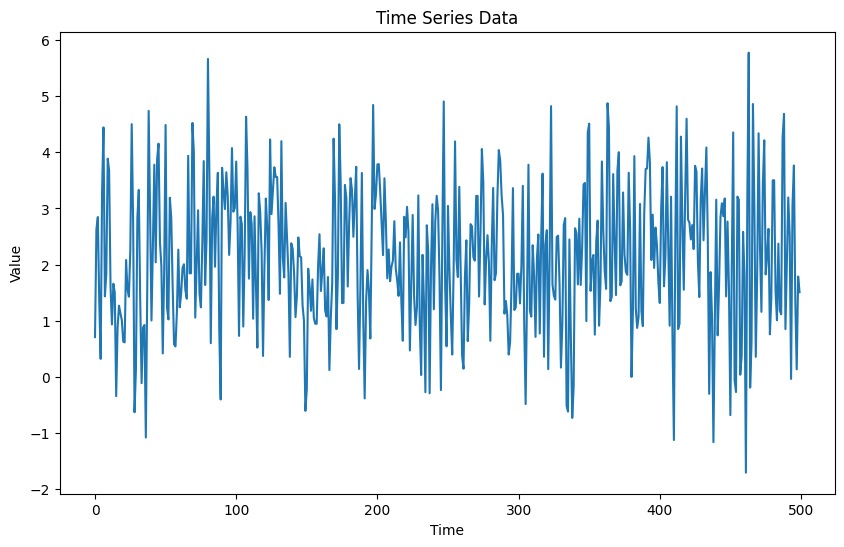

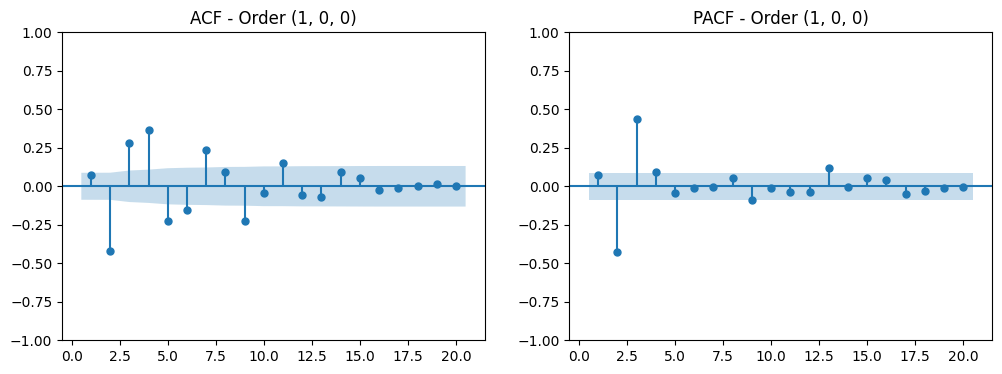

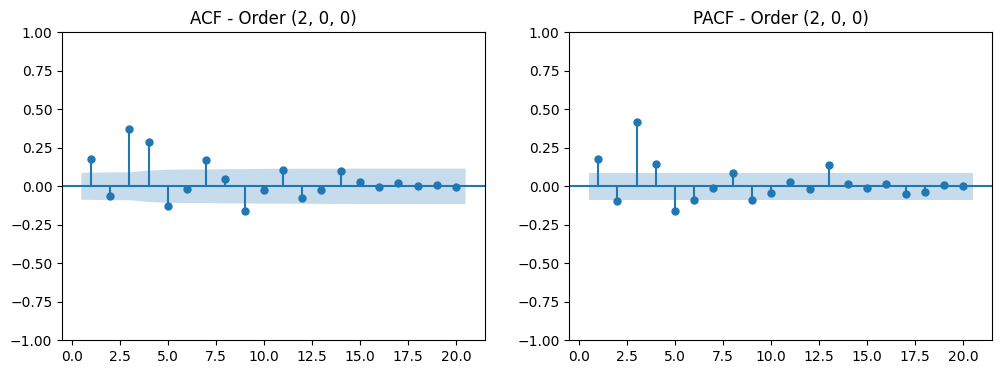

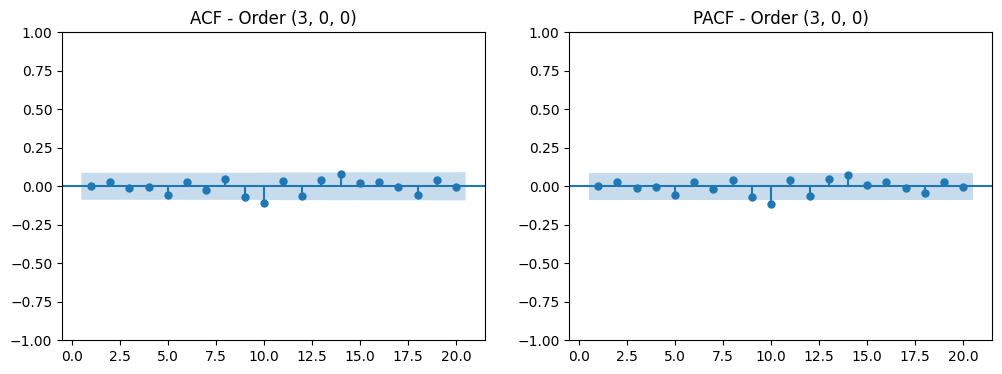

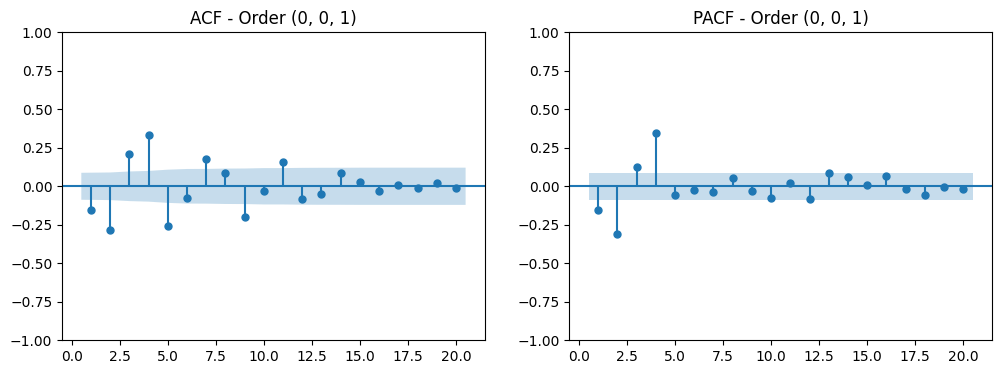

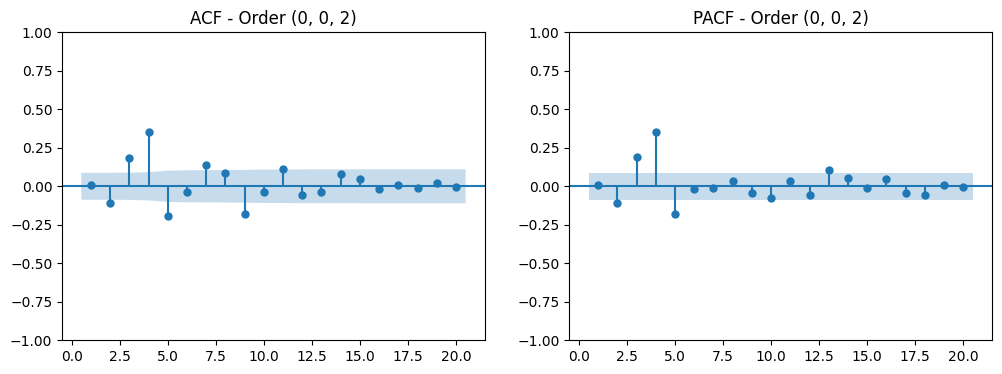

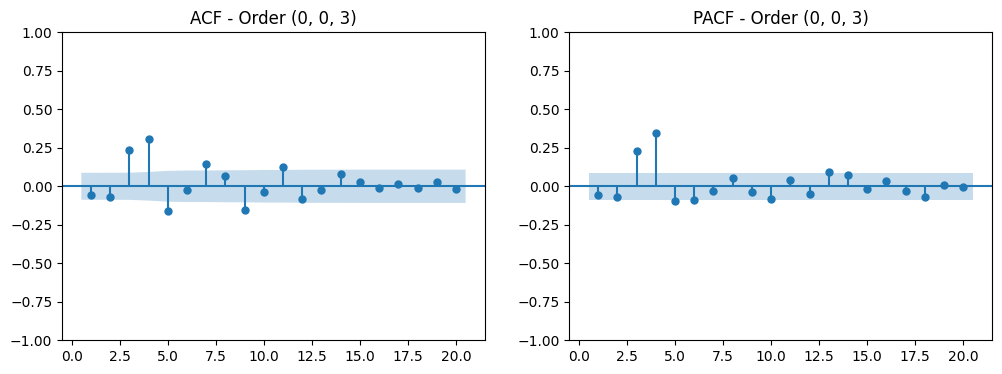

In [2]:
data_3 = pd.read_csv('data/time_series.csv')
time_series = data_3['x']

plt.figure(figsize=(10, 6))
plt.plot(time_series)
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

def fit_arima_model(order, time_series):
    model = ARIMA(time_series, order=order)
    results = model.fit()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    plot_acf(results.resid, lags=20, ax=ax1, title=f'ACF - Order {order}', zero=False)

    plot_pacf(results.resid, lags=20, ax=ax2, title=f'PACF - Order {order}', zero=False)

    plt.show()

for p in range(1, 4):
    fit_arima_model((p, 0, 0), time_series)

for q in range(1, 4):
    fit_arima_model((0, 0, q), time_series)

In [3]:
def fit_arima_and_get_stats(order, time_series):
    model = ARIMA(time_series, order=order)
    results = model.fit()
    aic = results.aic
    bic = results.bic
    return aic, bic

stats = {}

for p in range(1, 4):
    stats[f'AR({p})'] = fit_arima_and_get_stats((p, 0, 0), time_series)

for q in range(1, 4):
    stats[f'MA({q})'] = fit_arima_and_get_stats((0, 0, q), time_series)

stats_df = pd.DataFrame(stats, index=['AIC', 'BIC']).T
stats_df

,AIC,BIC
AR(1),1644.655505,1657.299329
AR(2),1581.079266,1597.937698
AR(3),1436.659807,1457.732847
MA(1),1567.403626,1580.047451
MA(2),1537.941206,1554.799639
MA(3),1536.867709,1557.940749


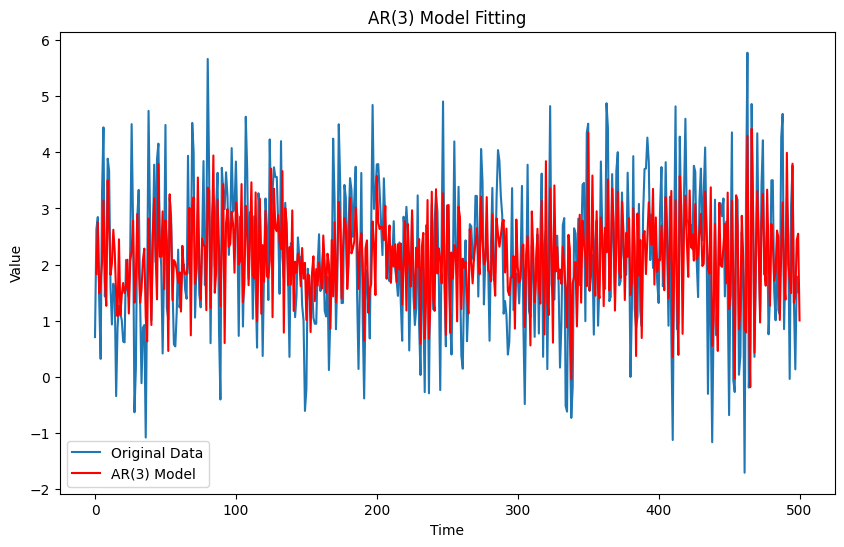

In [4]:
# AR(3) model has the lowest AIC and BIC
ar3_model = ARIMA(time_series, order=(3, 0, 0))
ar3_results = ar3_model.fit()

ar3_predictions = ar3_results.predict(start=1, end=len(time_series))

plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Original Data')
plt.plot(ar3_predictions, label='AR(3) Model', color='red')
plt.title('AR(3) Model Fitting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()